<a href="https://colab.research.google.com/github/luadeprataart/Reconhecimento-de-Padroes/blob/main/08_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 07 - Regressão Linear

Até agora foram vistos alguns conceitos de classificação. Outro importante aspecto do aprendizado supervisionado são os modelos de aprendizagem para problemas de regressão. Nestes problemas, a saída esperada é contínua, em vez de valores discretos como na classificação.

Um conjunto de dados de propaganda é disponibilizado junto com esse notebook, onde cada linha indica um tipo de mercado diferente. Importe os dados para visualizar a estrutura deles:

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('ad.data', index_col=0)
display(data.head())

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.shape

(200, 4)

Quais são os atributos?
- **TV:** dólares gastos em propagandas veiculadas na TV para um produto em determinado mercado (em milhões)
- **Radio:** dólares gastos em propagandas veiculadas em rádio
- **Newspaper:** dólares gastos com propaganda em jornais

Qual o rótulo da amostra?
- **Sales:** vendas (em milhares) de um determinado item em um mercado específico

Para facilitar, os dados também poderiam ser visualizados para compreender melhor com a distribuição, e se há alguma tendência.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


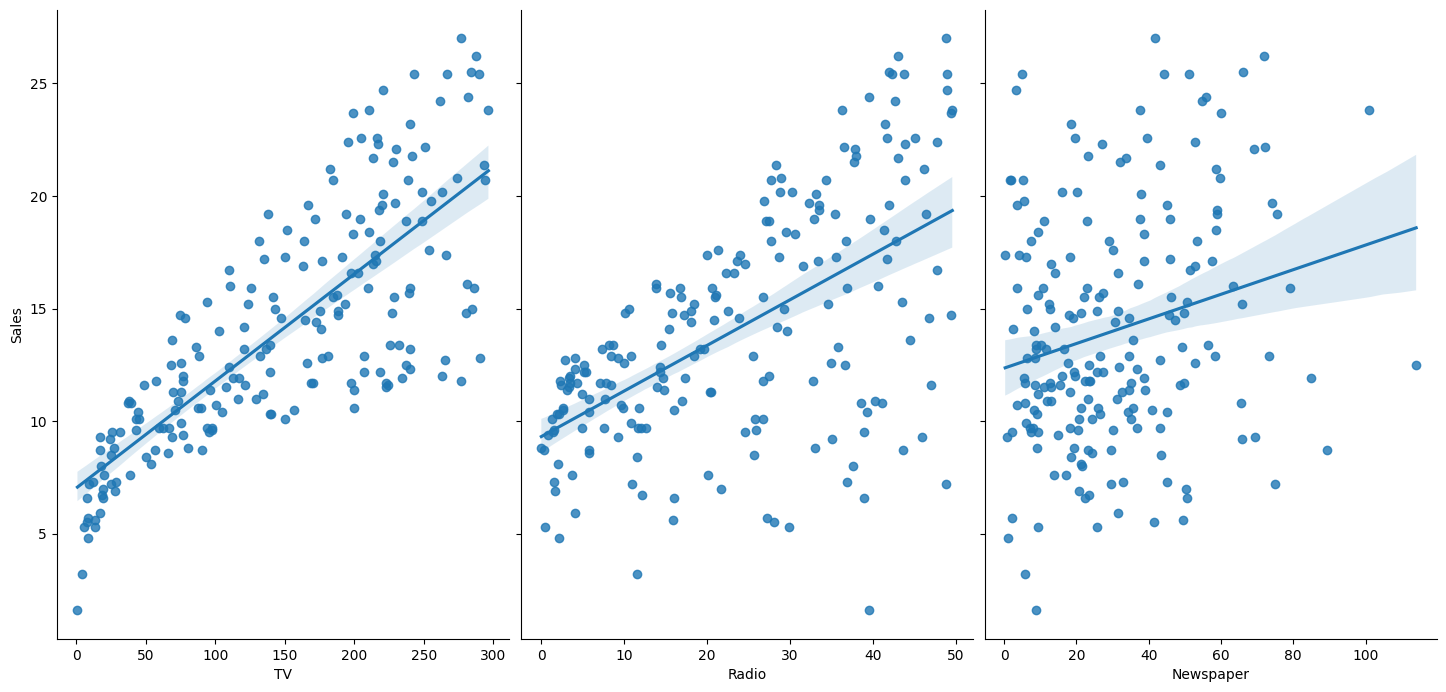

In [3]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Regressão Linear

Uma das formas de resolver um problema desse tipo é aplicando a regressão linear. Nesse método, procura-se uma função capaz de traçar uma linha de tendência que servirá para prever um valor futuro em determinadas condições. A vantagem é que é um modelo matematicamente simples de interpretar. A desvantagem é que dificilmente levará a uma acurácia satisfatória.

### Forma da regressão linear:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é um valor de bias (deslocamento)
- $\beta_1$ é o coeficiente de $x_1$ (do primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (do n-ésimo atributo)

Assim, para esse problema, tem-se:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Os valores $\beta$ são chamados de **coeficientes de modelo** e são ajustados na etapa de aprendizagem, a qual acontece com o ajuste do modelo utilizando o critério dos "quadrados mínimos". Uma vez aprendidos esses parâmetros, o modelo pode ser usado de forma preditiva!

### Separando os atributos da classe

In [4]:
atributos = ['TV', 'Radio', 'Newspaper']

X = data[atributos]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [5]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

Em seguida, é necessário dividir quais dados serão apresentados na etapa de treino e quais dados serão apresentados na etapa de teste:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


### Regressão linear no scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [8]:
print(modelo.intercept_)
print(modelo.coef_)

2.937215734690609
[0.04695205 0.17658644 0.00185115]


In [9]:
list(zip(atributos, modelo.coef_)) # o comando zip junta dois vetores e forma tuplas

#Beta alto = mais importancia
#Ou seja Radio é a mais relevante

[('TV', 0.04695204776848465),
 ('Radio', 0.1765864352681737),
 ('Newspaper', 0.0018511533188922402)]

$$y = 2.93 + 0.0469 \times TV + 0.176 \times Radio + 0.002 \times Newspaper$$

Como interpretar **o coeficiente da variável TV** (0.0469)?

Quanto mais positivo o valor, maior o impacto, quanto menor o valor (inclusive negativo), maior a contribuição na outra direção. Quando os dados estão normalizados, então para uma dada quantia gasta com de Radio e Newspaper, **um adicional de $1.000 gastos com TV** reflete diretamente na **venda de 46.6 itens**, segundo esse modelo.

### Predição

In [10]:
modelo.predict([[100,20,15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.19191652])

No cenário dado, era esperado a venda de aproximadamente **11,2 milhões** de itens de produto.

### Avaliação de modelos de regressão

Métricas como acurácia são comuns em problemas de classificação, mas não se aplicam em problemas de regressão. No lugar desta, são utilizadas métricas específicas para valores contínuos.

In [11]:
true = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

#Acuracia não é uma métrica valida para este tipo de analise
#O mais famoso é a MAE (média absoluta do erro)

#( |100-90| + |50-50| + |30-50| + |20-30| ) / 4

#Uso o MAE apenas como desenvolvedor para saber se o modelo está melhorando

**Mean Absolute Error** (MAE) é a média absoluta dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [12]:
# calculando MAE com scikit
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


**Mean Squared Error** (MSE) é a média do quadrado dos erros:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [13]:
# calculando MSE com scikit
print(metrics.mean_squared_error(true, pred))


150.0


**Root Mean Squared Error** (RMSE) é a raiz quadrada da média do quadrado dos erros:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [14]:
# calculando RMSE com scikit
print(np.sqrt(metrics.mean_squared_error(true, pred)))

#Mais utilizado

12.24744871391589


**Mean absolute percentage error** (MAPE) é a média do erro absoluto em percentual:

$$\displaystyle {\mbox{M}}={\frac {100\%}{n}}\sum _{t=1}^{n}\left|{\frac{y_i-\hat{y}_i}{y_i}}\right|$$

In [15]:
# calculando MAPE com numpy -- pq não tem no scikit :(
print(np.mean(np.abs((true - pred) / true)) * 100)

31.666666666666664


A comparação entre as diferentes métricas:

- **MAE** é a mais fácil de entender, porque é uma média.
- **MSE** é mais popular que a MAE porque pune erros maiores.
- **RMSE** é ainda mais popular porque, além das características anteriores, é interpretável em termos da variável de saída.
- **MAPE** é interpretável em termos percentual, porém é necessário tomar cuidado com a divisão por zero

### Calculando RMSE para as predições de Vendas

In [16]:
y_pred = modelo.predict(X_test)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

#under por poucos dados (boca do jacare)
#Cenario bom de treinamento é onde ambos caem juntos, treinamento e teste
#Uso LOS para isso (forulas de métricas anteriores)


RMSE: 1.388857410775697
MAPE: 8.545502795467279


### Validação Cruzada

In [17]:
from sklearn.model_selection import KFold

X = data[atributos].values
y = data.Sales.values

kf = KFold(n_splits = 10, random_state = 42, shuffle=True)

scores = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    #score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    #score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    score = modelo.score(X_test, y_test)
    scores.append(score)

scores = np.array(scores)

print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

R2: 0.87 (+/- 0.15)
[0.90469248 0.8946926  0.71976732 0.86420469 0.93868262 0.93194788
 0.92284837 0.8750849  0.93814699 0.74132062]


### Utilizando gradiente

(Referência: https://www.tensorflow.org/tutorials/keras/regression)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Achar o minimo global

#### Normalização

In [19]:
# as variáveis já foram separadas: X_train, X_test, y_train, y_test

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

#### Construção da regressão

In [20]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 3)                 7         
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 11 (48.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________


#### O modelo não treinado tem condições de dar respostas

In [21]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

1/1 [==============================] - 0s 141ms/step
-13.713453503251074


In [22]:
import matplotlib.pyplot as plt

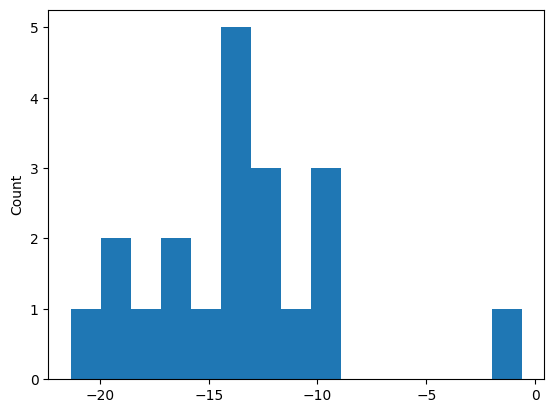

In [23]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

#### Inserção de otimizador e função de custo

In [24]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')
#toque aleatorio para frente para achar não convexo complexos

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split = 0.2)

# verbose=0 não gera saida

#Loss caindo sinal de que está aprendendo
# se para de aprender da over e para isso vc corta em uma epoca

Epoch 1/10
5/5 [==============================] - 1s 46ms/step - loss: 13.9719 - val_loss: 13.3295
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 13.4561 - val_loss: 12.9406
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 12.9113 - val_loss: 12.4880
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 12.3993 - val_loss: 12.0736
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 11.8773 - val_loss: 11.6616
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 11.3518 - val_loss: 11.2358
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 10.8408 - val_loss: 10.8130
Epoch 8/10
5/5 [==============================] - 0s 13ms/step - loss: 10.3224 - val_loss: 10.3839
Epoch 9/10
5/5 [==============================] - 0s 16ms/step - loss: 9.8176 - val_loss: 9.9511
Epoch 10/10
5/5 [==============================] - 0s 23ms/step - loss: 9.3282 - val_loss: 9.5107


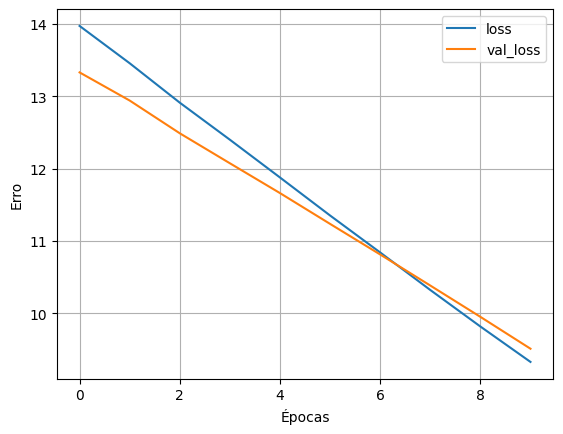

In [26]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

plot_loss(history)

#Cairam juntos e podem melhorar ainda
#Pode aumentar passo ou epoca para explorar o desconhecido e melhorar

In [27]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

1/1 [==============================] - 0s 57ms/step
-8.529408650398256


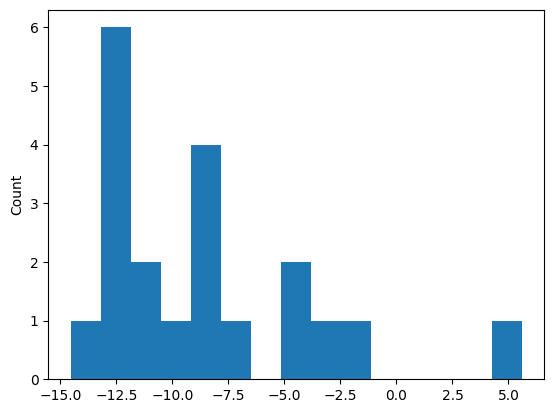

In [28]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

#### Treinando por mais tempo

In [29]:
# importante redefinir o modelo

model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    verbose=0)

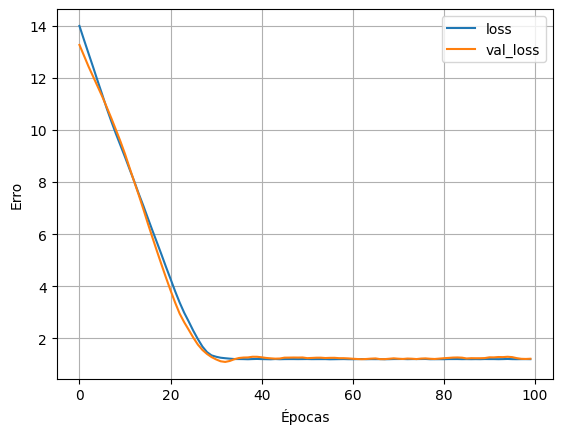

In [30]:
plot_loss(history)

In [31]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

1/1 [==============================] - 0s 34ms/step
0.8966844749450684


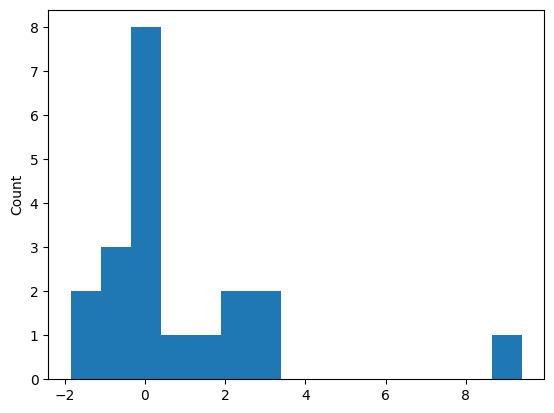

In [32]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

## Exercicio

O objetivo deste exercício é criar um modelo de regressão linear que preveja o comprimento da sépala da flor Iris com base em outras características da flor, como largura da sépala, comprimento da pétala e largura da pétala.

Passos do Exercício:

Passo 1: Importe as bibliotecas necessárias.

Passo 2: Carregue o conjunto de dados Iris.

Passo 3: Crie um DataFrame pandas com os dados.

Passo 4: Selecione as características que você deseja usar para prever o comprimento da sépala (por exemplo, largura da sépala, comprimento da pétala, largura da pétala).

Passo 5: Divida os dados em um conjunto de treinamento e um conjunto de teste.

Passo 6: Crie um modelo de regressão linear.

Passo 7: Treine o modelo com os dados de treinamento.


Passo 8: Faça previsões usando o modelo treinado.


Passo 9: Avalie o desempenho do modelo calculando o erro médio quadrático (MSE) e o coeficiente de determinação (R^2).


Passo 10: Desafio extra: Visualize os resultados usando gráficos para mostrar as previsões em relação aos valores reais.

Perguntas do Exercício:

1- Qual é o valor do Mean Squared Error (MSE) do modelo de regressão linear?

2- Qual é o valor do coeficiente de determinação (R^2) do modelo? O que isso indica sobre o ajuste do modelo aos dados?

3- Como você acha que o modelo de regressão linear se sairia se você usasse diferentes características para prever o comprimento da sépala?

4- Experimente ajustar o tamanho do conjunto de teste (alterando o test_size no Passo 5). Como isso afeta o desempenho do modelo?